# Лабораториска вежба 4
## Машинска визија 2018/2019
### Андреј Јанчевски - 151003

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2

In [2]:
def get_lbp_features(img, radius):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    width, height = img_gray.shape
    features = []
    for i in range(radius, width - radius):
        row = []
        for j in range(radius, height - radius):
            lbp = ""
            circle_points = []
            for k in range(j - radius, j + radius):
                circle_points.append((i - radius, k))
            for k in range(i - radius, i + radius):
                circle_points.append((k, j + radius))
            for k in range(j + radius, j - radius, -1):
                circle_points.append((i + radius, k))
            for k in range(i + radius, i - radius, -1):
                circle_points.append((k, j - radius))
            for k, (x, y) in enumerate(circle_points):
                lbp+="1" if img_gray[x][y] >= img_gray[i][j] else "0"
            row.append(lbp)
        features.append(row)
    return np.array(features)

In [3]:
def lbp_transform(img, radius):
    features = get_lbp_features(img, radius)
    print(features)
    img_result = np.zeros(features.shape, dtype='uint8')
    for i, row in enumerate(features):
        for j, lbp in enumerate(row):
            lbp_value = int(lbp, 2)
            img_result[i][j] = int(255 * (lbp_value / (2**(8 * radius) - 1)))
    return img_result

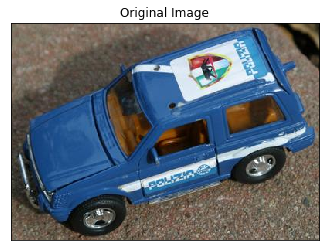

[['111111111111111111111111' '111111111111111111111111'
  '111111111111111000000000' ... '100000000000000111111111'
  '100000000000000111111111' '100011101111000111111111']
 ['111111111111111110011111' '111111111111111111011111'
  '111111111111111111000000' ... '110000000000000111111111'
  '110000000000000111111111' '100000001100000011111111']
 ['111111111111111111001111' '111111111111111111101111'
  '001111111111010111111100' ... '111000000000000111111111'
  '110000000000000111111111' '110000011000000111111111']
 ...
 ['100001011000000000000000' '100111011100111000000000'
  '111111111111111111011111' ... '010000000111111000000000'
  '100000000111111100000000' '000000000000001100000000']
 ['000111110000100000000000' '001111111001110000000000'
  '111111111111111101101111' ... '000000000000000000000000'
  '000000001111000000000000' '000000000000000000000000']
 ['000111100011110100000000' '001111110001110000000000'
  '011111111111111101000000' ... '000000000000000000000000'
  '00000001111

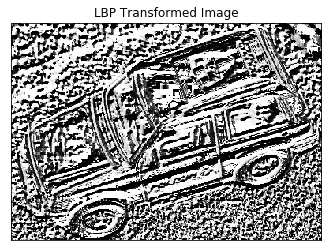

In [14]:
img = cv2.imread("car.jpg", cv2.IMREAD_COLOR)
plt.figure(1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.xticks([])
plt.yticks([])
plt.show()
img_transformed = lbp_transform(img, radius=3)
plt.figure(2)
plt.title("LBP Transformed Image")
plt.imshow(img_transformed, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()